In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
data = 'train.csv'
df = pd.read_csv(data)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

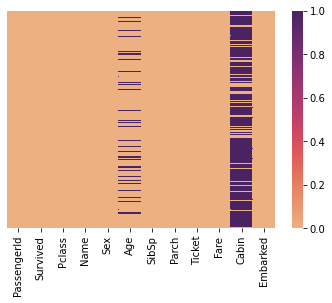

In [5]:
sns.color_palette("flare", as_cmap=True)
sns.heatmap(df.isnull(),yticklabels=False,cmap='flare')

<AxesSubplot:xlabel='Survived', ylabel='count'>

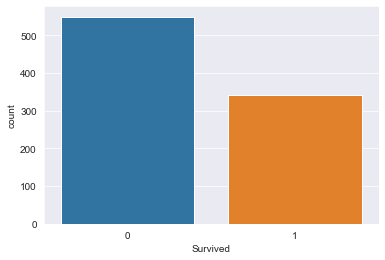

In [6]:
sns.set_style("darkgrid")
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

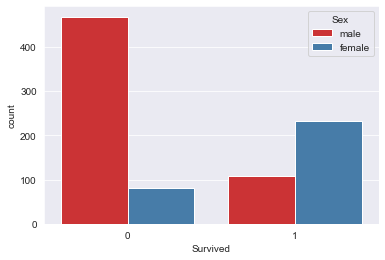

In [7]:
sns.set_style("darkgrid")
sns.countplot(x="Survived",hue="Sex",data=df,palette='Set1')

<AxesSubplot:xlabel='Survived', ylabel='count'>

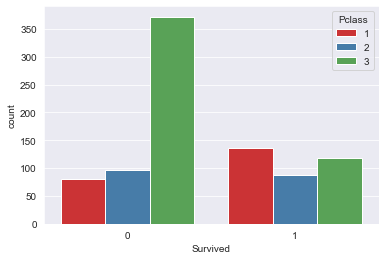

In [8]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='Set1')

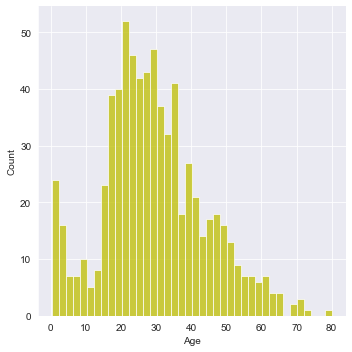

In [9]:
sns.displot(df['Age'],kde=False,bins=40,color='y')

<AxesSubplot:>

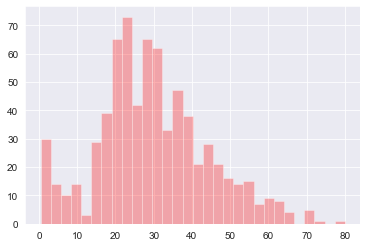

In [10]:
df['Age'].hist(bins=30,alpha=0.3,color='red')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

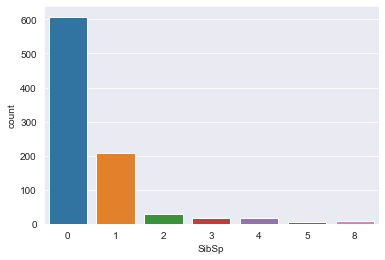

In [11]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

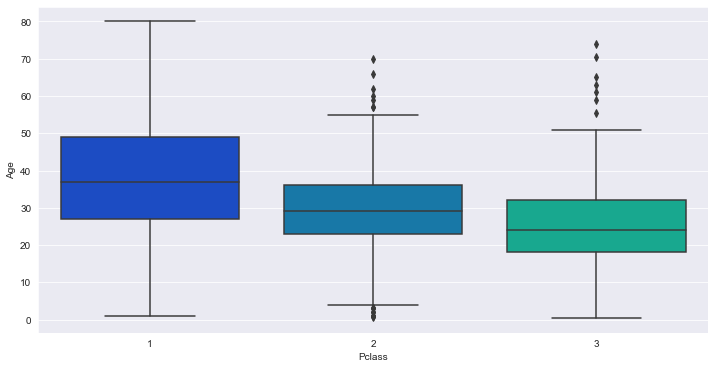

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

c:\users\e-shop\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


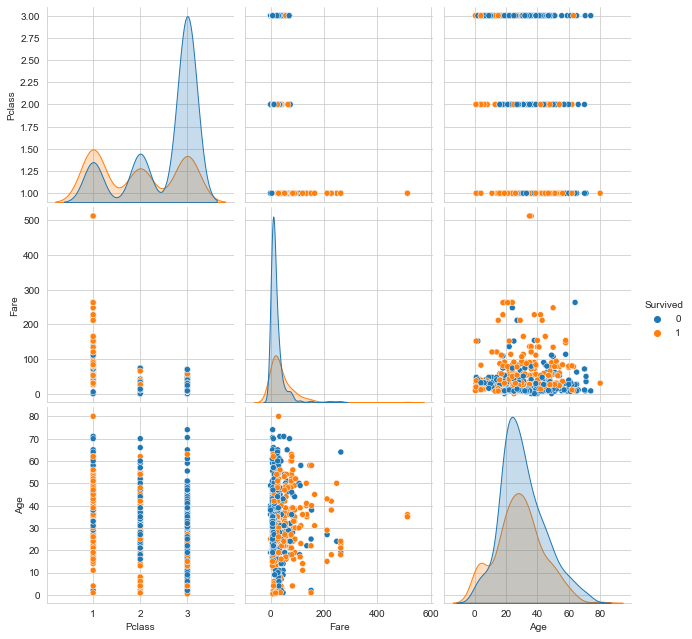

In [13]:
sns.set_style("whitegrid");
sns.pairplot(df[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 25
    else:
        return Age

In [15]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

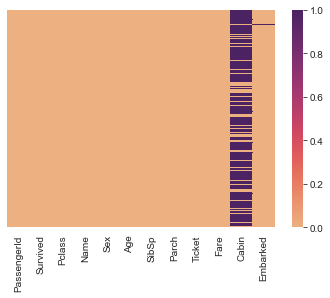

In [16]:
sns.color_palette("flare", as_cmap=True)
sns.heatmap(df.isnull(),yticklabels=False,cmap='flare')

In [17]:
df.drop('Cabin',axis=1,inplace=True)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


## Hypothesis Testing

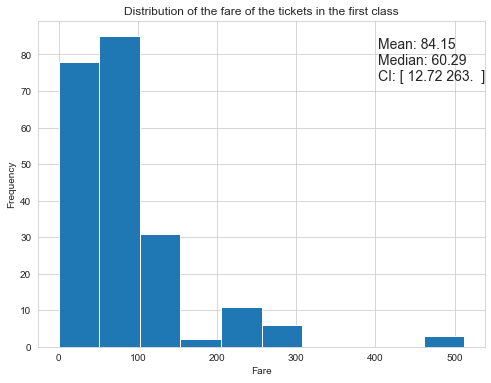

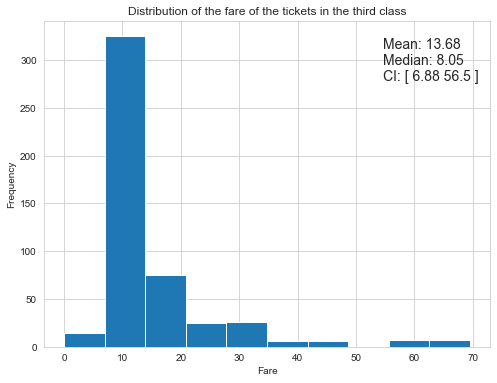

In [20]:
first_class_fare = df['Fare'][df['Pclass']==1]
first_class_mean = round(np.mean(first_class_fare), 2)
first_class_median = round(np.median(first_class_fare),2)
first_class_conf = np.round(np.percentile(first_class_fare, [2.5, 97.5]), 2)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(first_class_fare)
ax.text(0.76, 0.95, f"Mean: {first_class_mean} \nMedian: {first_class_median} \nCI: {first_class_conf}",
        transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of the fare of the tickets in the first class")
plt.show()

# Distribution for Poor

third_class_fare = df['Fare'][df['Pclass']==3]
third_class_mean = round(np.mean(third_class_fare), 2)
third_class_median = round(np.median(third_class_fare),2)
third_class_conf = np.round(np.percentile(third_class_fare, [2.5, 97.5]), 2)

fig, ax = plt.subplots(figsize = (8,6))
ax.hist(third_class_fare)

ax.text(0.76, 0.95, f"Mean: {third_class_mean} \nMedian: {third_class_median} \nCI: {third_class_conf}",
        transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of the fare of the tickets in the third class")
plt.show()   


The first-class tickets range between 12.72 and 263 with an average of 84.15 while the third class tickets range between 6.88 and 56.5 with an average of 13.68. So we can see that the class feature is a representation of the socio-economic status of the people in the ship and we can assume that those in the first-class group are the rich.

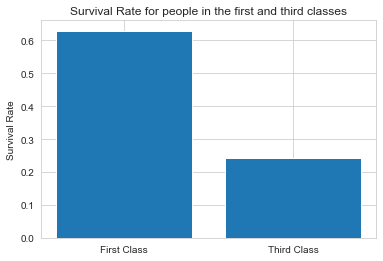

In [21]:
x = ["First Class","Third Class"]
y = np.mean(df["Survived"][df["Pclass"] == 1]), np.mean(df["Survived"][df["Pclass"]==3])
plt.bar(x,y)
plt.ylabel("Survival Rate")
plt.title("Survival Rate for people in the first and third classes")
plt.show()

From the plot, first-class people had a higher rate of survival.

## Z-Test and the Central Limit Theorem for Hypothesis Testing
-Null Hypothesis: The socio-economic class of the people didn’t have an effect on the survival rate.
-Alternative Hypothesis: The socio-economic class of the people affected their survival rate.

In [22]:
first_class_sample = np.array([np.mean(df[df["Pclass"]==1].sample(20)["Survived"].values) for i in range(100)])
third_class_sample = np.array([np.mean(df[df["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])

c:\users\e-shop\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\e-shop\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


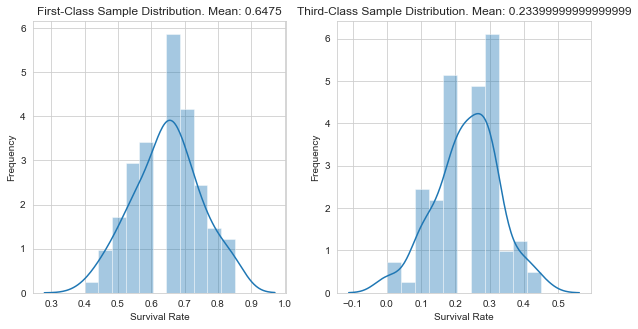

In [23]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(first_class_sample)
plt.title("First-Class Sample Distribution. Mean: "+str(np.mean(first_class_sample)))
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(third_class_sample)
plt.title("Third-Class Sample Distribution. Mean: "+str(np.mean(third_class_sample)))
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

In [24]:
effect = np.mean(first_class_sample) - np.mean(third_class_sample)
sigma_first = np.std(first_class_sample)
sigma_third = np.std(third_class_sample)
sigma_difference = np.sqrt((sigma_first**2)/len(first_class_sample) + (sigma_third**2)/len(third_class_sample))

z_score = effect/sigma_difference

print(effect)
print(z_score)

0.4135
30.187508328531443


In [25]:
st.norm.sf(abs(z_score))*2

3.4551820231382547e-200